In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 6

Let $f(x)$ be a sufficiently smooth function, and $\tilde f(x)$ be a small perturbation of $f$. Similarly, let $p_m(x)$ and $\tilde p_m(x)$ be their respective Lagrange interpolating polynomials. Then we have $$\large {\|p_m(x) - \tilde p_m(x)\|}_\infty \le \Lambda_m \max_{j \in \{0, \dotsc, m\}} |f(x_j) - \tilde f(x_j)|,$$ where $\Lambda_m$ is the Lebesgue constant $$\large \Lambda_m = {\left\| \sum_{k=0}^m |L_k(x)| \right\|}_\infty.$$

### Q6 (a)

Write a Python function `Lambda(m)` that takes a number $m \in \mathbb{N}$ with $m \ge 2$ and computes the Lebesgue constant for $m+1$ equally spaced nodes on the interval $x \in [-1, 1]$ including the boundaries. Approximate the $\infty$-norm by taking the maximum over 100 values of $x$. Use your implementation to compute $\Lambda_{10}$.

In [2]:
def L_k(nodes, k, x):
    all_j = np.arange(0, len(nodes))
    j = all_j[all_j != k]
    return np.multiply.reduce((x - nodes[j]) / (nodes[k] - nodes[j]))


def Lambda_with_nodes(nodes):
    def one_sum(x):
        return np.sum(
            [np.abs(L_k(nodes, k, x)) for k in np.arange(0, len(nodes))]
        )
        
    xs = np.array(list(map(one_sum, np.linspace(-1, 1, 1000))))
    return np.maximum.reduce(xs)

In [3]:
def Lambda(m):
    assert m >= 2, "Lambda(m) needs m >= 2"
    
    return Lambda_with_nodes(np.linspace(-1, 1, m + 1))

In [4]:
print("Lambda_{10} =", Lambda(10))

Lambda_{10} = 29.897758816015603


### Q6 (b)

Use this function to plot $\Lambda_m$ for equally spaced grids against $m$ for values of $m$ up to 30, and with logarithmic scaling on the $y$-axis. Show in your plot that this $\Lambda_m$ behaves like $$\large \Lambda_m \sim \frac{2^m}{m \ln m}$$ up to an unimportant multiplicative constant. Comment on what this result has to do with numerical well-posedness, stability, and convergence.

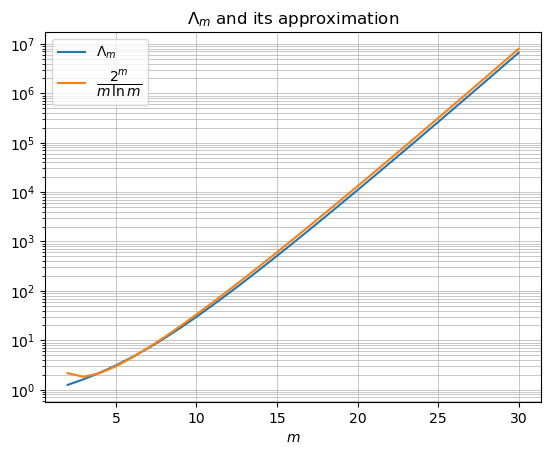

In [5]:
def plot_Lambda_m() -> None:
    m = np.arange(2, 31)
    Lm = np.array(list(map(Lambda, m)))
    approx = 0.75 * (2**m / (m * np.log(m)))

    plt.semilogy(m, Lm, label=r"$\Lambda_m$")
    plt.semilogy(m, approx, label=r"$\dfrac{2^m}{m \, \ln m}$")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$\Lambda_m$ and its approximation")
    plt.legend()
    plt.xlabel("$m$")

    plt.show()
    plt.clf()
    plt.close()


plot_Lambda_m()

The Lebesgue constant plays the role of the condition number. Since $\Lambda_m \to \infty$ as $m \to \infty$, we can conclude that this particular method of using equally spaces nodes is an unstable method. The method is still well-posed, but is not stable and therefore (by the Lax equivalence theorem) it cannot be stable.

### Q6 (c)

Now write a new function `LambdaC(m)` that computes the Lebesgue constant for $m \in \mathbb{N}$ with $m \ge 2$ as above, but on nodes located at $$\large x_i = \cos\left( \frac{i \pi}m \right) \qquad \text{where } i \in \{0, \dotsc, m\}.$$
Plot this new constant against $m$ for 20 values of $m$ up to 200. Compare this against $\dfrac2\pi \ln m$, up to an unimportant additive constant. What do you conclude, in comparison to the results above?

In [6]:
def LambdaC(m):
    assert m >= 2, "LambdaC(m) needs m >= 2"
    
    i = np.arange(0, m + 1)
    return Lambda_with_nodes(np.cos(i * np.pi / m))

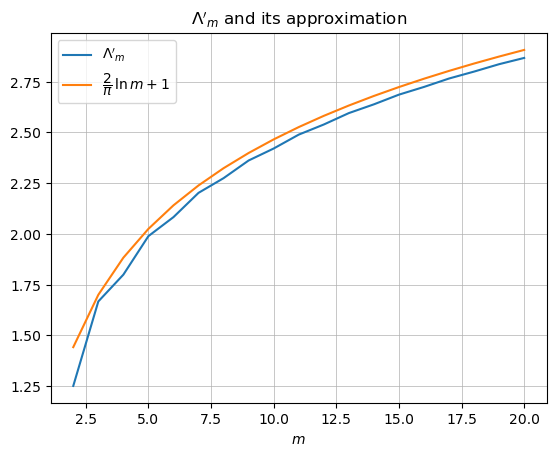

In [7]:
def plot_LambdaC_m() -> None:
    m = np.arange(2, 21)
    Lm = np.array(list(map(LambdaC, m)))
    approx = (2 / np.pi) * np.log(m) + 1

    plt.plot(m, Lm, label=r"$\Lambda'_m$")
    plt.plot(m, approx, label=r"$\dfrac{2}{\pi} \, \ln m + 1$")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$\Lambda'_m$ and its approximation")
    plt.legend()
    plt.xlabel("$m$")

    plt.show()
    plt.clf()
    plt.close()


plot_LambdaC_m()

Unlike with the previous method, this $\Lambda_m' \not\to \infty$ as $m \to \infty$. We can therefore conclude that this method of choosing nodes is stable. It is clearly well-posed and consistent, so by the Lax equivalence theorem, it is also convergent. This is obviously a much better method of choosing nodes.

# Question 7

The formula given in **Q4** allows for a recursive definition of the Lagrange interpolating polynomial. In this problem, we want to implement this recursive formula.

### Q7 (a)

Implement a function `recursive_f(f, nodes)` which takes a function $f$ and an array of nodes $x = (x_0, \dotsc, x_k)$ and returns $f[x_0, \dotsc, x_k]$ as defined in **Q4**. Use this to compute $f[0, 1, 2, 3]$ for $f(x) = \sin x$.

In [8]:
def recursive_f(f, nodes):
    if len(nodes) == 0:
        raise ValueError("recursive_f requires a list of at least 1 node")
        
    if len(nodes) == 1:
        return f(nodes[0])
        
    f1 = recursive_f(f, nodes[1:])
    f0 = recursive_f(f, nodes[:-1])
    denom = nodes[-1] - nodes[0]
    return (f1 - f0) / denom

In [9]:
print("f[0, 1, 2, 3] =", recursive_f(np.sin, np.arange(4)))

f[0, 1, 2, 3] = -0.010393219665581396


### Q7 (b

Now write a function `qk(f, nodes, k, x)` which computes the polynomial $q_k(x)$ as defined in **Q4**. You can make use of the function you implemented for the previous problem.

Use this to plot into a single figure, for $f(x) = \sqrt x$ and the nodes $x = (0, 1, 2, 3, 4)$, the polynomials $q_k(x)$ for $k \in \{0, 1, 2, 3, 4\}$ on the interval $x \in [0, 5]$. Make sure to plot $f(x)$ for comparison, and plot the locations of all the nodes into the same plot as well.

In [10]:
def qk(f, nodes, k, x):
    assert len(nodes) > 0, "qk requires a list of at least 1 node"
    assert type(nodes) == np.ndarray, "qk requires nodes to be a NumPy array"
    assert type(x) == np.ndarray, "qk requires x to be a NumPy array"

    if k == 0:
        # `x` is a NumPy array, so we want `qk` to always return an array of the same length,
        # but $f(x_0)$ returns a scalar, so we have to repeat it
        return np.repeat(f(nodes[0]), len(x))

    # We have to be very careful with indices and slices here
    prev_q = qk(f, nodes, k - 1, x)
    f_eval = recursive_f(f, nodes[:k + 1])
    # For each element `x_` in the array `x`, takes its difference with each node up to k-1 and multiply them
    x_paren_prod = np.array(list(map(
        lambda x_: np.multiply.reduce(x_ - nodes[:k]),
        x
    )))
    
    return prev_q + f_eval * x_paren_prod

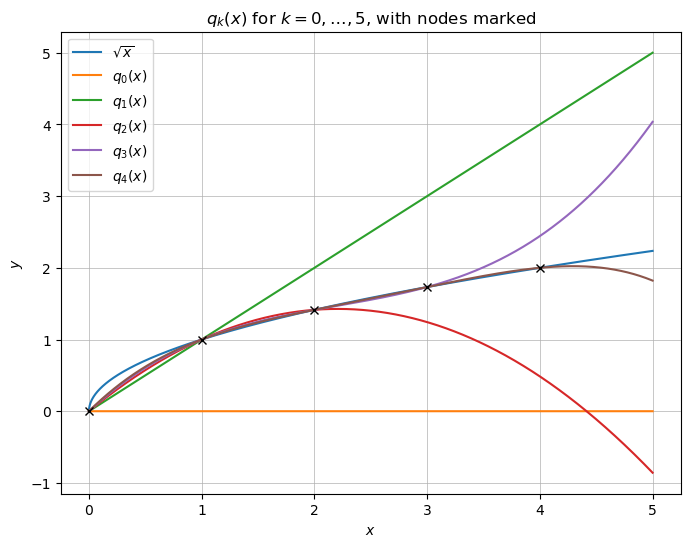

In [11]:
def plot_qk() -> None:
    # https://stackoverflow.com/a/41717533
    plt.rcParams["figure.figsize"] = (8, 6)
    
    x = np.linspace(0, 5, 2500)
    f = np.sqrt(x)

    plt.plot(x, f, label=r"$\sqrt{x}$")

    for k in range(5):
        q = qk(np.sqrt, np.arange(5), k, x)
        plt.plot(x, q, label=f"$q_{{{k}}}(x)$")
        
    for n in range(5):
        plt.plot(n, np.sqrt(n), "x", color="black")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"$q_k(x)$ for $k = 0, \ldots, 5$, with nodes marked")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$y$")

    plt.show()
    plt.clf()
    plt.close()

    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


plot_qk()

# Question 8

Implement three functions `midpoint(f, a, b)`, `trapezoidal(f, a, b)`, and `simpson(f, a, b)` which respectively implement the midpoint, trapezoidal, and Cavalieri–Simpson quadrature formulas for the approximating the integral $$\large I(f) = \int_a^b f(x) \, \mathrm d x.$$

In [12]:
def midpoint(f, a, b):
    return 0.5 * (a + b) * (b - a)


def trapezoidal(f, a, b):
    return 0.5 * (b - a) * (f(a) + f(b))


def simpson(f, a, b):
    return ((b - a) / 6) * (f(a) + 4 * f(0.5 * (a + b)) + f(b))

### Q8 (a)

Use all three functions to approximate the integral of $f(x) = \tanh(x)$ on the interval $[0, 1]$ and compare against the exact result. Collect your results in a table with the columns "Method", "Value", and "Error", giving each quadrature's name, its value $I_n(f)$, and its absolute error $|I_n(f) - I(f)|$, rounded to 3 significant digits. Comment on your results.

In [13]:
exact = np.log(np.cosh(1))

print("Method\t\tValue\tError")
print("-------------------------------")

# The `{:.3g}` format specifier correctly rounds to 3 significant figures
m = midpoint(np.tanh, 0, 1)
m_error = np.abs(m - exact)
print(f"Midpoint\t{m:.3g}\t{m_error:.3g}")

t = trapezoidal(np.tanh, 0, 1)
t_error = np.abs(t - exact)
print(f"Trapezoidal\t{t:.3g}\t{t_error:.3g}")

s = simpson(np.tanh, 0, 1)
s_error = np.abs(s - exact)
print(f"Simpson\t\t{s:.3g}\t{s_error:.3g}")

Method		Value	Error
-------------------------------
Midpoint	0.5	0.0662
Trapezoidal	0.381	0.053
Simpson		0.435	0.00123


The midpoint formula does fairly well, the trapezoidal formula does a bit betterm and Cavalieri–Simpson performs best. This is what I would expect.

### Q8 (b)

On the interval $[0, h]$ for some $h > 0$, use again all three functions to compute the integral of the function $f(x) = \dfrac{1}{1 + x^2}$ for values $h = 2^{-k}$ with $k \in \{0, \dotsc, 10\}$. Compute also the exact results for these values of $h$.

Plot the absolute value of the error of the three quadrature rules in a log-log plot against $h$. What do you observe for their scaling by comparing against $h^\gamma$ for appropriately chosen values of $\gamma$? Interpret your results by stating which quadrature scales with $h$ to what order, and relate this to the results derived in lectures.

In [14]:
def integral_and_approximations(h):
    """Computes the integral of 1/(1 + x^2) from 0 to h in 4 ways and returns `(exact, midpoint, trapezoidal, simpson)`."""
    if type(h) == np.ndarray:
        assert (h > 0).all()
    else:
        assert h > 0

    f = lambda x: 1 / (1 + x*x)
    
    e = np.tanh(h)
    m = midpoint(f, 0, h)
    t = trapezoidal(f, 0, h)
    s = simpson(f, 0, h)
    
    return (e, m, t, s)


for k in np.arange(11):
    h = 2.0**-k
    (e, m, t, s) = integral_and_approximations(h)
    print(f"h = 2^{{{-k}}}")
    print(f"Exact       = {e:.5g}")
    print(f"Midpoint    = {m:.5g}")
    print(f"Trapezoidal = {t:.5g}")
    print(f"Simpson     = {s:.5g}")
    print("\n")

h = 2^{0}
Exact       = 0.76159
Midpoint    = 0.5
Trapezoidal = 0.75
Simpson     = 0.78333


h = 2^{-1}
Exact       = 0.46212
Midpoint    = 0.125
Trapezoidal = 0.45
Simpson     = 0.46373


h = 2^{-2}
Exact       = 0.24492
Midpoint    = 0.03125
Trapezoidal = 0.24265
Simpson     = 0.24498


h = 2^{-3}
Exact       = 0.12435
Midpoint    = 0.0078125
Trapezoidal = 0.12404
Simpson     = 0.12436


h = 2^{-4}
Exact       = 0.062419
Midpoint    = 0.0019531
Trapezoidal = 0.062378
Simpson     = 0.062419


h = 2^{-5}
Exact       = 0.03124
Midpoint    = 0.00048828
Trapezoidal = 0.031235
Simpson     = 0.03124


h = 2^{-6}
Exact       = 0.015624
Midpoint    = 0.00012207
Trapezoidal = 0.015623
Simpson     = 0.015624


h = 2^{-7}
Exact       = 0.0078123
Midpoint    = 3.0518e-05
Trapezoidal = 0.0078123
Simpson     = 0.0078123


h = 2^{-8}
Exact       = 0.0039062
Midpoint    = 7.6294e-06
Trapezoidal = 0.0039062
Simpson     = 0.0039062


h = 2^{-9}
Exact       = 0.0019531
Midpoint    = 1.9073e-06
Trapezoid

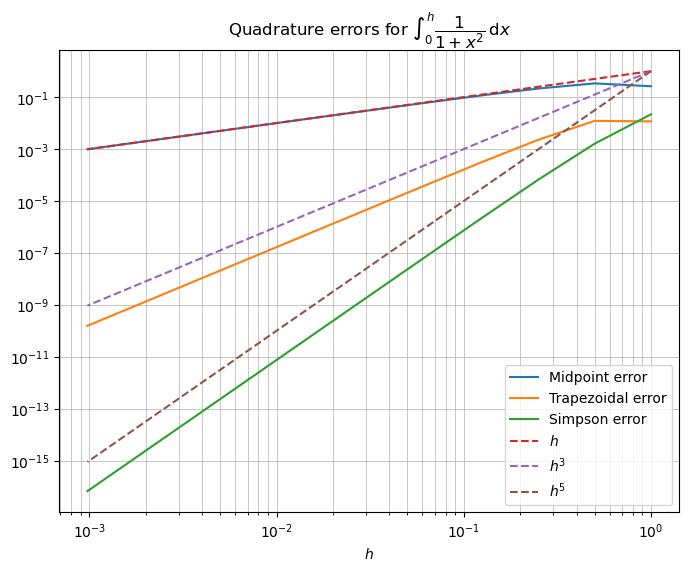

In [15]:
def plot_integral_approximations() -> None:
    plt.rcParams["figure.figsize"] = (8, 6)
    
    k = np.arange(11)
    h = 2.0**-k
    (e, m, t, s) = integral_and_approximations(h)
    
    m_error = np.abs(e - m)
    t_error = np.abs(e - t)
    s_error = np.abs(e - s)

    plt.loglog(h, m_error, label="Midpoint error")
    plt.loglog(h, t_error, label="Trapezoidal error")
    plt.loglog(h, s_error, label="Simpson error")
    
    plt.loglog(h, h, label="$h$", linestyle="dashed")
    plt.loglog(h, h**3, label="$h^3$", linestyle="dashed")
    plt.loglog(h, h**5, label="$h^5$", linestyle="dashed")

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    
    plt.title(r"Quadrature errors for $\int_0^h \dfrac{1}{1 + x^2} \, {\rm d} x$")
    plt.legend()
    plt.xlabel("$h$")

    plt.show()
    plt.clf()
    plt.close()
    
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


plot_integral_approximations()

The midpoint error scales linearly with $h$, the trapezoidal error scales like $h^3$, and the Cavalieri–Simpson formula scales like $h^5$. This is exactly what the theory in lectures would suggest, since $b - a = h - 0 = h$.

### Q8 (c)

Quantify the above by computing the experimental order of convergence (EOC) for each method. Show the results in a table with columns "$h$", "Midpoint", "Trapezoid", "Simpson", and each row giving the value of $h$ and the EOC for each method, to a sensible accuracy.

In [16]:
print("h\t\tMidpoint\tTrapezoid\tSimpson")
print("-------------------------------------------------------")

for k in np.arange(2, 11):
    (e, m, t, s) = integral_and_approximations(2.0**-k)
    m_error = np.abs(e - m)
    t_error = np.abs(e - t)
    s_error = np.abs(e - s)

    (prev_e, prev_m, prev_t, prev_s) = integral_and_approximations(2.0**-(k-1))
    prev_m_error = np.abs(prev_e - prev_m)
    prev_t_error = np.abs(prev_e - prev_t)
    prev_s_error = np.abs(prev_e - prev_s)

    eoc_m = np.log(prev_m_error / m_error) / np.log(2)
    eoc_t = np.log(prev_t_error / t_error) / np.log(2)
    eoc_s = np.log(prev_s_error / s_error) / np.log(2)
    
    print(f"2^{{{-k}}}\t\t{eoc_m:.4g}\t\t{eoc_t:.4g}\t\t{eoc_s:.4g}")

h		Midpoint	Trapezoid	Simpson
-------------------------------------------------------
2^{-2}		0.6579		2.415		4.601
2^{-3}		0.8745		2.852		4.892
2^{-4}		0.9466		2.963		4.972
2^{-5}		0.9755		2.991		4.993
2^{-6}		0.9882		2.998		4.998
2^{-7}		0.9942		2.999		5
2^{-8}		0.9972		3		5
2^{-9}		0.9986		3		5
2^{-10}		0.9993		3		5.001
